In [2]:
# mounting the drive

from google.colab import drive
drive.mount("/content/drive")



Mounted at /content/drive


In [3]:
# Importing all the neccessary library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

random_state = 228

In [4]:
# Defining the file path where the CSV is stored

file_path = '/content/drive/MyDrive/data/france_weather_energy.csv'

In [5]:
# Loading the CSV file into Pandas dataframe
df = pd.read_csv(file_path)

In [6]:
# Displaying the first 5 rows
df.head()

,temp,dew_point,pressure,humidity,wind_speed,wind_deg,clouds_all,production_wind,production_solar
0,17.31,13.83,1021,80,1.42,20,99,4763.0,0.0
1,16.65,13.00,1021,79,0.67,35,77,4653.0,0.0
2,15.85,12.22,1020,79,1.25,350,24,4456.0,0.0
3,15.05,12.19,1020,83,1.61,358,1,4268.0,0.0
4,13.95,11.82,1020,87,1.44,349,5,3790.0,15.0


In [7]:
# checking the number of rows and columns
df.shape

(25771, 9)

In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 temp                0
dew_point           0
pressure            0
humidity            0
wind_speed          0
wind_deg            0
clouds_all          0
production_wind     0
production_solar    0
dtype: int64


In [9]:
df

,temp,dew_point,pressure,humidity,wind_speed,wind_deg,clouds_all,production_wind,production_solar
0,17.31,13.83,1021,80,1.42,20,99,4763.0,0.0
1,16.65,13.00,1021,79,0.67,35,77,4653.0,0.0
2,15.85,12.22,1020,79,1.25,350,24,4456.0,0.0
3,15.05,12.19,1020,83,1.61,358,1,4268.0,0.0
4,13.95,11.82,1020,87,1.44,349,5,3790.0,15.0
...,...,...,...,...,...,...,...,...,...
25766,19.74,8.74,1017,49,5.08,283,99,5742.0,1273.0
25767,18.81,8.47,1017,51,5.17,287,100,5152.0,439.0
25768,17.41,9.32,1017,59,4.88,285,100,4857.0,50.0
25769,16.00,10.32,1018,69,4.27,272,100,5140.0,1.0


In [10]:
# Dropping specified columns for X and selecting them for y, then displaying the first few rows of each

y_cols = ["production_wind", "production_solar"]
X = df.drop(columns=y_cols)
y = df[y_cols]
display(X.head())
display(y.head())

,temp,dew_point,pressure,humidity,wind_speed,wind_deg,clouds_all
0,17.31,13.83,1021,80,1.42,20,99
1,16.65,13.00,1021,79,0.67,35,77
2,15.85,12.22,1020,79,1.25,350,24
3,15.05,12.19,1020,83,1.61,358,1
4,13.95,11.82,1020,87,1.44,349,5


,production_wind,production_solar
0,4763.0,0.0
1,4653.0,0.0
2,4456.0,0.0
3,4268.0,0.0
4,3790.0,15.0


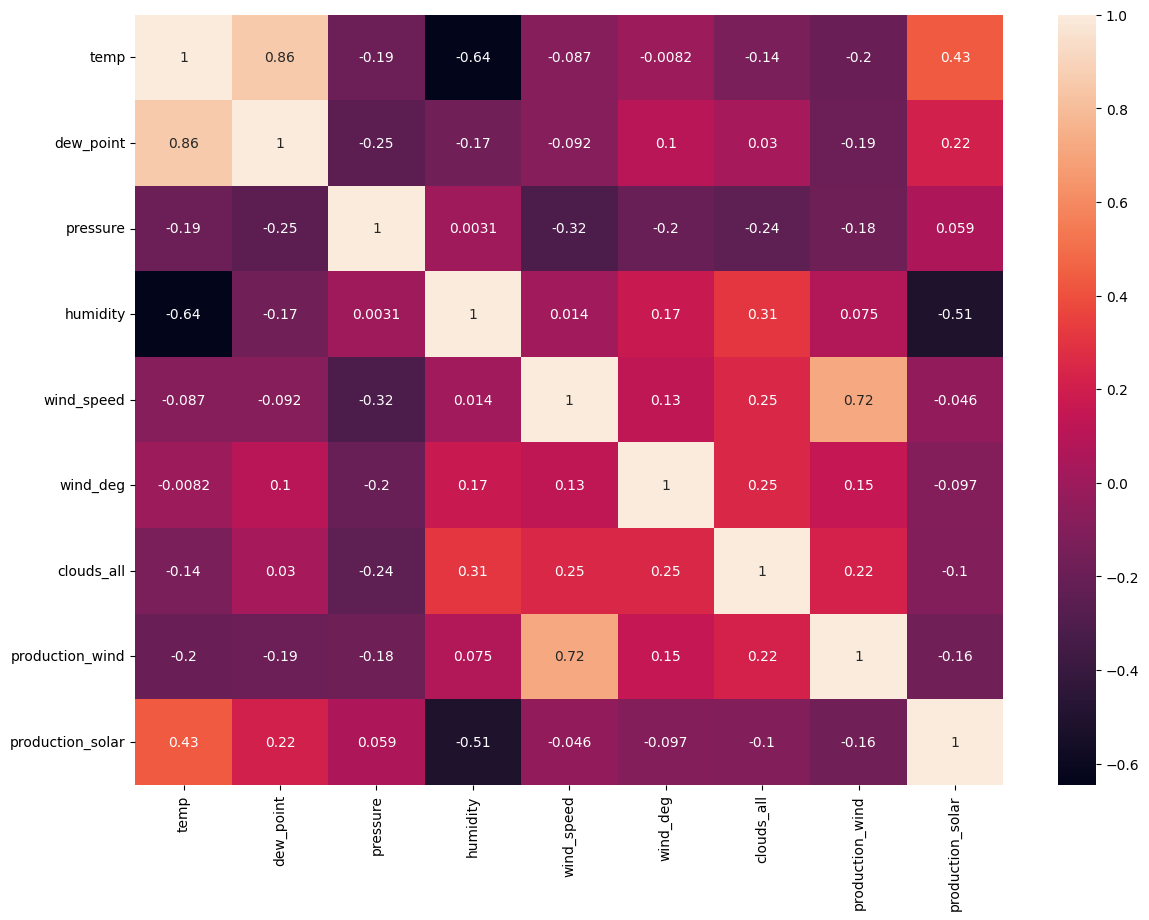

In [11]:
# Generate and display a heatmap of the correlation matrix for the DataFrame

corr = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True)
plt.show()

In [12]:
# Split the dataset into 80:20 ratio for Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [13]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Model Training - defining a dictionary of Random Forest parameter options for model tuning

rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}



In [15]:
#Initialize GridSearchCV for tuning RandomForestRegressor

from sklearn.model_selection import GridSearchCV
rf_grid_wind = GridSearchCV(RandomForestRegressor(), rf_params, cv=3, n_jobs=-1)
rf_grid_solar = GridSearchCV(RandomForestRegressor(), rf_params, cv=3, n_jobs=-1)




In [16]:
rf_grid_wind.fit(X_train_scaled, y_train["production_wind"])
rf_grid_solar.fit(X_train_scaled, y_train["production_solar"])

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [22]:
# Diplaying the best hyperparameters - for training the model

print("Best wind params:", rf_grid_wind.best_params_)
print("Best solar params:", rf_grid_solar.best_params_)


Best wind params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best solar params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [23]:
# Model Evaluation and Prediction
rf_wind_pred = rf_grid_wind.predict(X_test_scaled)
rf_solar_pred = rf_grid_solar.predict(X_test_scaled)

In [24]:
# Evaluate the models using RMSE
rmse_rf_wind = mean_squared_error(y_test["production_wind"], rf_wind_pred, squared=False)
rmse_rf_solar = mean_squared_error(y_test["production_solar"], rf_solar_pred, squared=False)

In [25]:
# Evaluate the models using R2 score
from sklearn.metrics import r2_score
r2_rf_wind = r2_score(y_test["production_wind"], rf_wind_pred)
r2_rf_solar = r2_score(y_test["production_solar"], rf_solar_pred)


In [26]:
# Display the Evaluation Report

print("Wind Evaluation Report")
print("RMSE:", round(rmse_rf_wind, 2))
print("R2 Score:", round(r2_rf_wind, 2))
print()
print("Solar Evaluation Report")
print("RMSE:", round(rmse_rf_solar, 2))
print("R2 Score:", round(r2_rf_solar, 2))

Wind Evaluation Report
RMSE: 1758.22
R2 Score: 0.74

Solar Evaluation Report
RMSE: 1148.61
R2 Score: 0.5


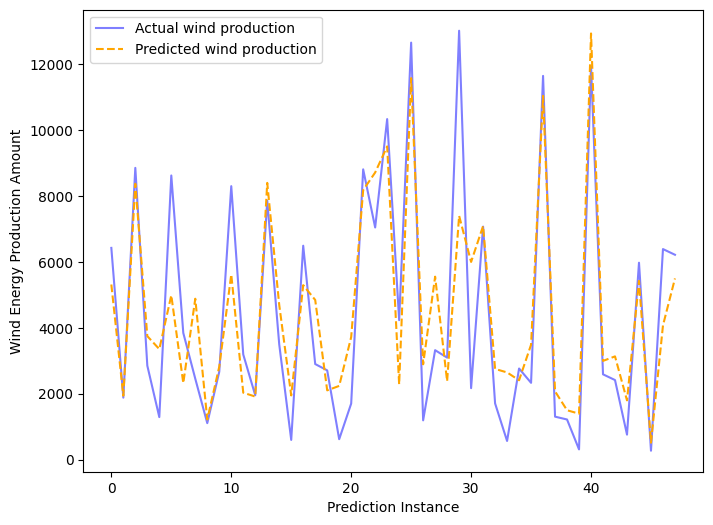

In [27]:
# Visualizing the actual and predicted value for wind energy production

import matplotlib.pyplot as plt
figsize = (8, 6)
range_n = 24 * 2
plt.figure(figsize=figsize)

# Plot the true wind production
plt.plot(
    y_test["production_wind"].to_list()[:range_n],
    label="Actual wind production",
    color="blue",
    linestyle="solid",
    alpha=0.5,
)

# Plot the predicted wind production
plt.plot(
    rf_wind_pred[:range_n],
    label="Predicted wind production",
    color="orange",
    linestyle="dashed",
)
# Add labels for the x and y axes
plt.xlabel("Prediction Instance")
plt.ylabel("Wind Energy Production Amount")

# Add legend
plt.legend()

# Show the plot
plt.show()


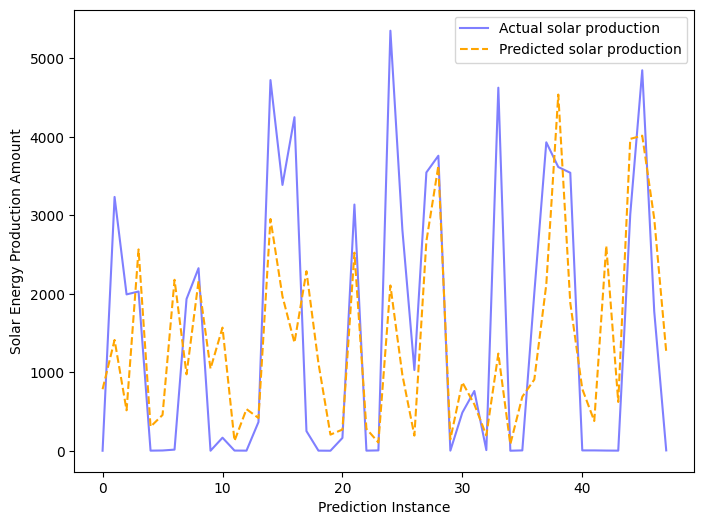

In [28]:
# Visualizing the actual and predicted value for solar energy production

import matplotlib.pyplot as plt

# Define the figure size
figsize = (8, 6)
range_n = 24 * 2

plt.figure(figsize=figsize)

# Plot the true solar production
plt.plot(
    y_test["production_solar"].to_list()[:range_n],
    label="Actual solar production",
    color="blue",
    linestyle="solid",
    alpha=0.5,
)

# Plot the predicted solar production
plt.plot(
    rf_solar_pred[:range_n],
    label="Predicted solar production",
    color="orange",
    linestyle="dashed",
)

# Add labels for the x and y axes
plt.xlabel("Prediction Instance")
plt.ylabel("Solar Energy Production Amount")

# Add legend
plt.legend()

# Show the plot
plt.show()


MultiOutput Regressor

In [29]:
# Initialize Random Forest regressor
rf_regressor = RandomForestRegressor()

In [30]:
from sklearn.multioutput import MultiOutputRegressor
multi_output_rf = MultiOutputRegressor(rf_regressor)

In [31]:
# Fit the MultiOutputRegressor on the training data
multi_output_rf.fit(X_train_scaled, y_train)


MultiOutputRegressor(estimator=RandomForestRegressor())

In [32]:
y_multi_pred = multi_output_rf.predict(X_test_scaled)

In [33]:
# Calculate total wind production
total_wind_production = sum(y_multi_pred[:, 0])

# Calculate total solar production
total_solar_production = sum(y_multi_pred[:, 1])

print("Total wind production:", total_wind_production)
print("Total solar production:", total_solar_production)

Total wind production: 23453453.91633337
Total solar production: 5866739.894166675


In [34]:
from sklearn.metrics import mean_squared_error, r2_score
print("MultiOutput Regression report")

# Calculate RMSE
rmse_multi = mean_squared_error(y_test, y_multi_pred, squared=False)

# Calculate R-squared (R2) score
r2_multi = r2_score(y_test, y_multi_pred)

# Print RMSE and R2 score
print("RMSE:", rmse_multi)
print("R2 Score:", r2_multi)


MultiOutput Regression report
RMSE: 1453.5629491417467
R2 Score: 0.6207410840383907


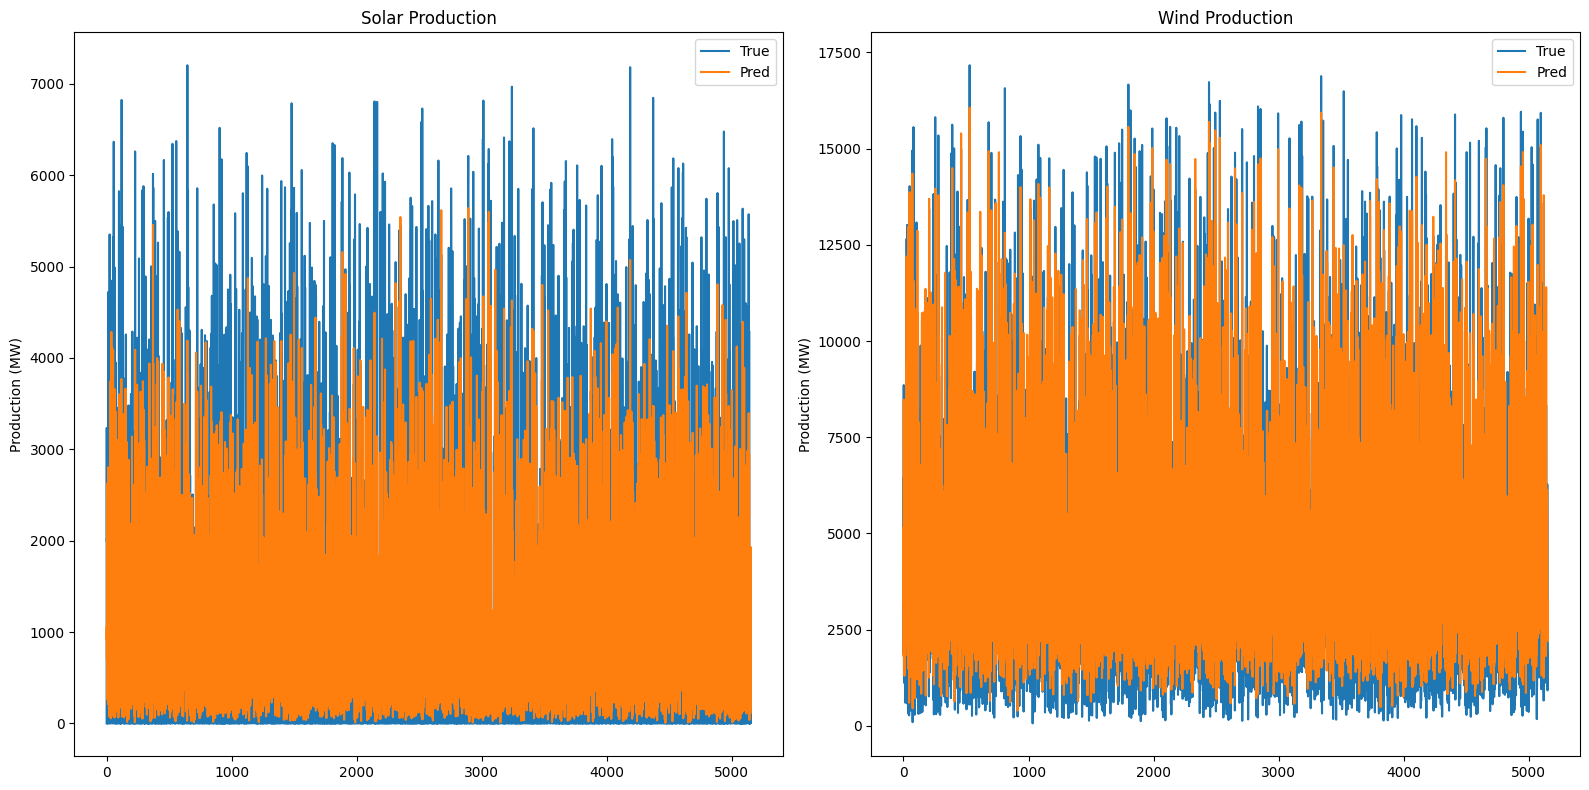

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot for solar production
sns.lineplot(data=y_test.reset_index(), x=y_test.reset_index().index, y='production_solar', label='True', ax=axes[0])
sns.lineplot(data=y_multi_pred[:, 1], label='Pred', ax=axes[0])
axes[0].set_title('Solar Production')
axes[0].set_xlabel('')
axes[0].set_ylabel('Production (MW)')

# Plot for wind production
sns.lineplot(data=y_test.reset_index(), x=y_test.reset_index().index, y='production_wind', label='True', ax=axes[1])
sns.lineplot(data=y_multi_pred[:, 0], label='Pred', ax=axes[1])
axes[1].set_title('Wind Production')
axes[1].set_xlabel('')
axes[1].set_ylabel('Production (MW)')

# Show the plot
plt.tight_layout()
plt.show()
